# ICASSP 2024 RF Challenge - Data Generation Notebook

This notebook will help you:
1. Generate training mixtures from your SigMF dataset
2. Verify data quality
3. Visualize the results
4. Load data for training

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
from pathlib import Path
from tqdm.notebook import tqdm
import os

%matplotlib inline

print("✅ Imports successful!")
print(f"NumPy version: {np.__version__}")

✅ Imports successful!
NumPy version: 2.1.3


## 2. Verify Dataset Structure

In [2]:
# Check dataset
dataset_root = Path('dataset')

if not dataset_root.exists():
    print("❌ Dataset not found!")
    print("Please adjust the path below:")
    dataset_root = Path(input("Enter dataset path: "))

print(f"✅ Dataset found at: {dataset_root}")

# Check structure
for subset in ['demod_train', 'demod_val']:
    for interference in ['CommSignal2', 'CommSignal3', 'EMISignal1']:
        soi_path = dataset_root / subset / 'Components' / interference / 'QPSK'
        int_path = dataset_root / subset / 'Components' / interference / 'Interference'
        
        if soi_path.exists() and int_path.exists():
            soi_files = len(list(soi_path.glob('*.sigmf-data')))
            int_files = len(list(int_path.glob('*.sigmf-data')))
            print(f"✅ {subset}/{interference}: {soi_files} SOI files, {int_files} interference files")
        else:
            print(f"❌ {subset}/{interference}: Missing!")

✅ Dataset found at: dataset
✅ demod_train/CommSignal2: 1100 SOI files, 1100 interference files
✅ demod_train/CommSignal3: 1100 SOI files, 1100 interference files
✅ demod_train/EMISignal1: 1100 SOI files, 1100 interference files
✅ demod_val/CommSignal2: 1100 SOI files, 1100 interference files
✅ demod_val/CommSignal3: 1100 SOI files, 1100 interference files
✅ demod_val/EMISignal1: 1100 SOI files, 1100 interference files


## 3. Generate Mixtures

Choose ONE of the options below:

### Option B: Generate ALL configurations (Full Dataset)

In [3]:
# Training sets
print("Generating TRAINING mixtures...")
for interference in ['CommSignal2', 'CommSignal3', 'EMISignal1']:
    print(f"\n{'='*70}")
    print(f"Processing: QPSK vs {interference} (TRAINING)")
    print(f"{'='*70}")
    !python sigmf_mixer.py \
        --dataset_root dataset \
        --subset demod_train \
        --interference_type {interference} \
        --soi_type QPSK \
        --n_samples_per_sinr 100 \
        --seed 42

Generating TRAINING mixtures...

Processing: QPSK vs CommSignal2 (TRAINING)

Generating Mixtures: QPSK vs CommSignal2
Subset: demod_train

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_mixtures.npy
   - Ground truth: dataset\training_mixtures\demodtrain_QPSK_CommSignal2_soi_groundtrut


Generating mixtures: 100%|██████████| 1100/1100 [00:02<00:00, 532.74it/s]



Generating Mixtures: QPSK vs CommSignal3
Subset: demod_train

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_mixtures.npy
   - Ground truth: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_soi_groundtruth.npy
   - Metadata: dataset\training_mixtures\demodtrain_QPSK_CommSignal3_m


Generating mixtures: 100%|██████████| 1100/1100 [00:29<00:00, 37.81it/s]



Generating Mixtures: QPSK vs EMISignal1
Subset: demod_train

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_mixtures.npy
   - Ground truth: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_soi_groundtruth.npy
   - Metadata: dataset\training_mixtures\demodtrain_QPSK_EMISignal1_metadata.


Generating mixtures: 100%|██████████| 1100/1100 [00:59<00:00, 18.43it/s]


In [4]:
# Validation sets
print("Generating VALIDATION mixtures...")
for interference in ['CommSignal2', 'CommSignal3', 'EMISignal1']:
    print(f"\n{'='*70}")
    print(f"Processing: QPSK vs {interference} (VALIDATION)")
    print(f"{'='*70}")
    !python sigmf_mixer.py \
        --dataset_root dataset \
        --subset demod_val \
        --interference_type {interference} \
        --soi_type QPSK \
        --n_samples_per_sinr 100 \
        --seed 1042

Generating VALIDATION mixtures...

Processing: QPSK vs CommSignal2 (VALIDATION)

Processing: QPSK vs CommSignal3 (VALIDATION)

Generating Mixtures: QPSK vs CommSignal2
Subset: demod_val

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodval_QPSK_CommSignal2_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodval_QPSK_CommSignal2_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodval_QPSK_CommSignal2_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodval_QPSK_CommSignal2_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodval_QPSK_CommSignal2_mixtures.npy
   - Ground truth: dataset\training_mixtures\demo


Generating mixtures: 100%|██████████| 1100/1100 [01:21<00:00, 13.43it/s]



Processing: QPSK vs EMISignal1 (VALIDATION)

Generating Mixtures: QPSK vs CommSignal3
Subset: demod_val

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodval_QPSK_CommSignal3_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodval_QPSK_CommSignal3_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodval_QPSK_CommSignal3_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodval_QPSK_CommSignal3_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodval_QPSK_CommSignal3_mixtures.npy
   - Ground truth: dataset\training_mixtures\demodval_QPSK_CommSignal3_soi_groundtruth.npy
   - Metadata: dataset\training_mixture


Generating mixtures: 100%|██████████| 1100/1100 [01:22<00:00, 13.28it/s]



Generating Mixtures: QPSK vs EMISignal1
Subset: demod_val

Loading file lists...
Found 1100 SOI files
Found 1100 interference files

Generating 1100 mixtures (11 SINR levels × 100 samples)...
SINR range: -33.0 dB to 3.0 dB


Saving generated data...

✓ Saved mixtures: dataset\training_mixtures\demodval_QPSK_EMISignal1_mixtures.npy
  Shape: (1100, 40960)
✓ Saved SOI ground truth: dataset\training_mixtures\demodval_QPSK_EMISignal1_soi_groundtruth.npy
  Shape: (1100, 40960)
✓ Saved metadata: dataset\training_mixtures\demodval_QPSK_EMISignal1_metadata.pkl
  1100 entries
✓ Saved metadata array: dataset\training_mixtures\demodval_QPSK_EMISignal1_metadata.npy

Generation complete!


✅ All done! You can now use these files for training:
   - Mixtures: dataset\training_mixtures\demodval_QPSK_EMISignal1_mixtures.npy
   - Ground truth: dataset\training_mixtures\demodval_QPSK_EMISignal1_soi_groundtruth.npy
   - Metadata: dataset\training_mixtures\demodval_QPSK_EMISignal1_metadata.pkl



Generating mixtures: 100%|██████████| 1100/1100 [01:19<00:00, 13.87it/s]


## 4. Verify Generated Data

In [5]:
# Verify all generated mixtures
!python verify_mixtures.py --verify_all --mixture_dir dataset/training_mixtures2

Error: Directory not found: dataset\training_mixtures2


## 5. Load and Inspect Data

In [6]:
# Load one configuration
mixture_file = 'dataset/training_mixtures/demodtrain_QPSK_CommSignal2_mixtures.npy'
gt_file = 'dataset/training_mixtures/demodtrain_QPSK_CommSignal2_soi_groundtruth.npy'
meta_file = 'dataset/training_mixtures/demodtrain_QPSK_CommSignal2_metadata.pkl'

# Check if files exist
if not Path(mixture_file).exists():
    print("❌ Files not found. Please run the generation step above first.")
else:
    mixtures = np.load(mixture_file)
    soi_gt = np.load(gt_file)
    with open(meta_file, 'rb') as f:
        metadata = pickle.load(f)
    
    print(f"✅ Data loaded successfully!")
    print(f"\nData shapes:")
    print(f"  Mixtures:       {mixtures.shape}")
    print(f"  SOI ground truth: {soi_gt.shape}")
    print(f"  Metadata entries: {len(metadata)}")
    
    print(f"\nData info:")
    print(f"  Data type:      {mixtures.dtype}")
    print(f"  Total samples:  {len(mixtures)}")
    print(f"  Samples/signal: {mixtures.shape[1]}")
    
    print(f"\nFirst sample metadata:")
    print(f"  Target SINR:    {metadata[0]['target_sinr_db']:.2f} dB")
    print(f"  Actual SINR:    {metadata[0]['actual_sinr_db']:.2f} dB")
    print(f"  Scaling factor: {metadata[0]['k']:.4f}")

✅ Data loaded successfully!

Data shapes:
  Mixtures:       (1100, 40960)
  SOI ground truth: (1100, 40960)
  Metadata entries: 1100

Data info:
  Data type:      complex64
  Total samples:  1100
  Samples/signal: 40960

First sample metadata:
  Target SINR:    -33.00 dB
  Actual SINR:    -33.00 dB
  Scaling factor: 11.2208


## 6. Visualize Signal Mixtures

Low SINR example (first sample):


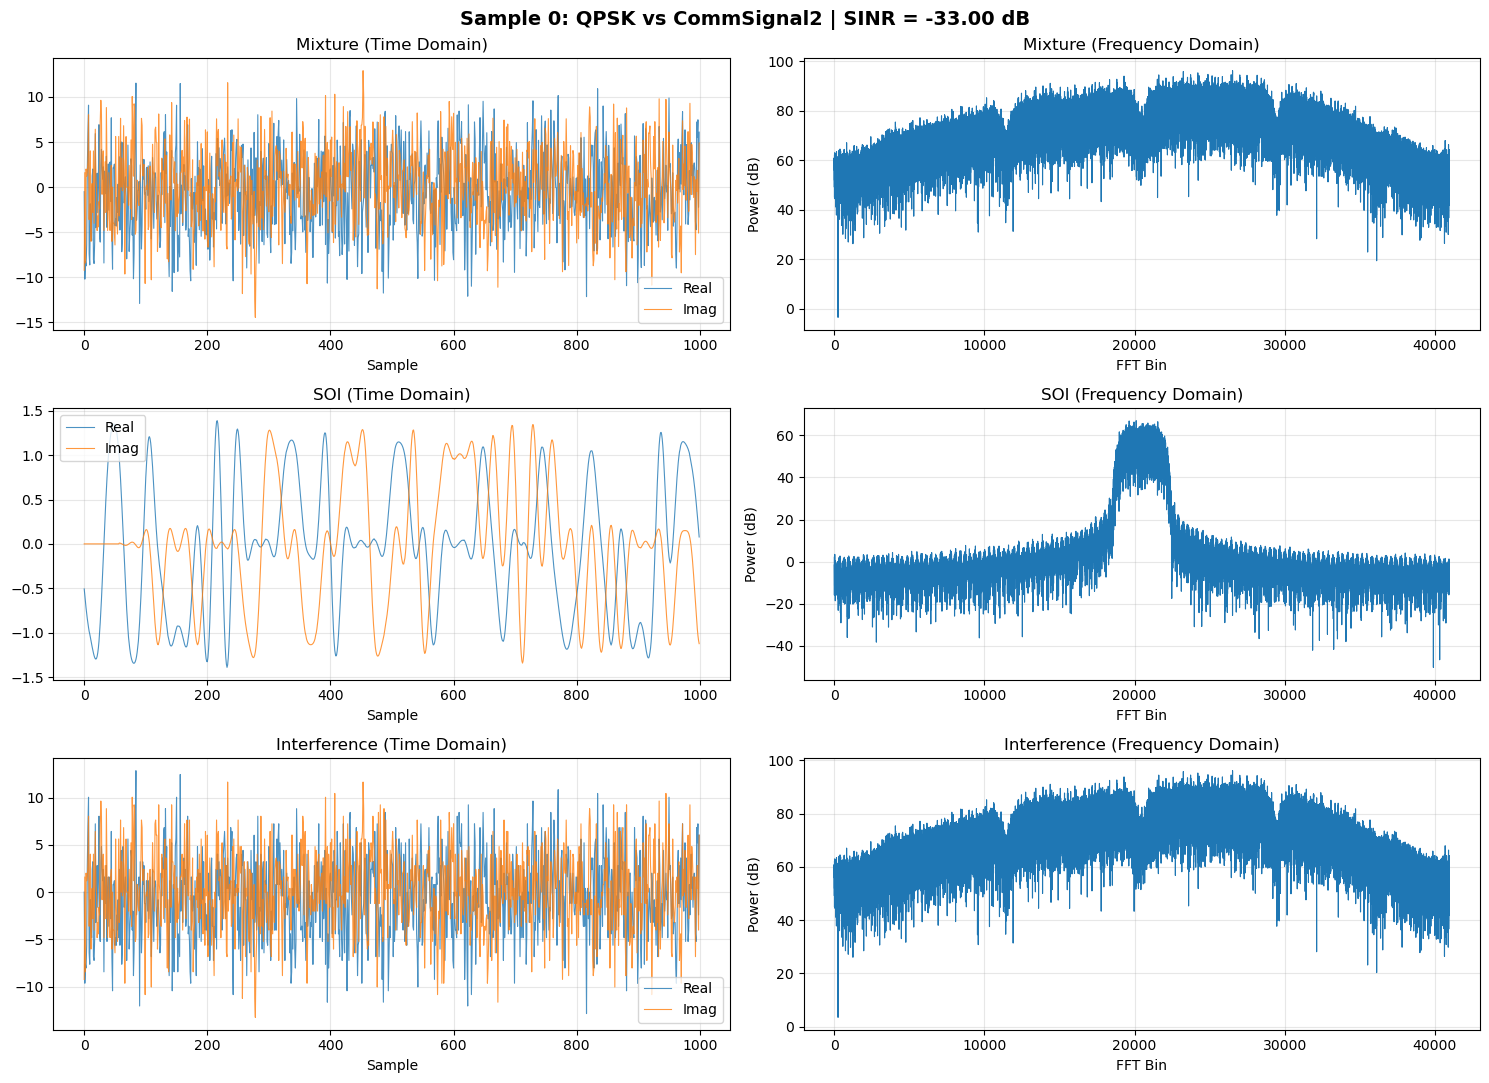


Medium SINR example (middle sample):


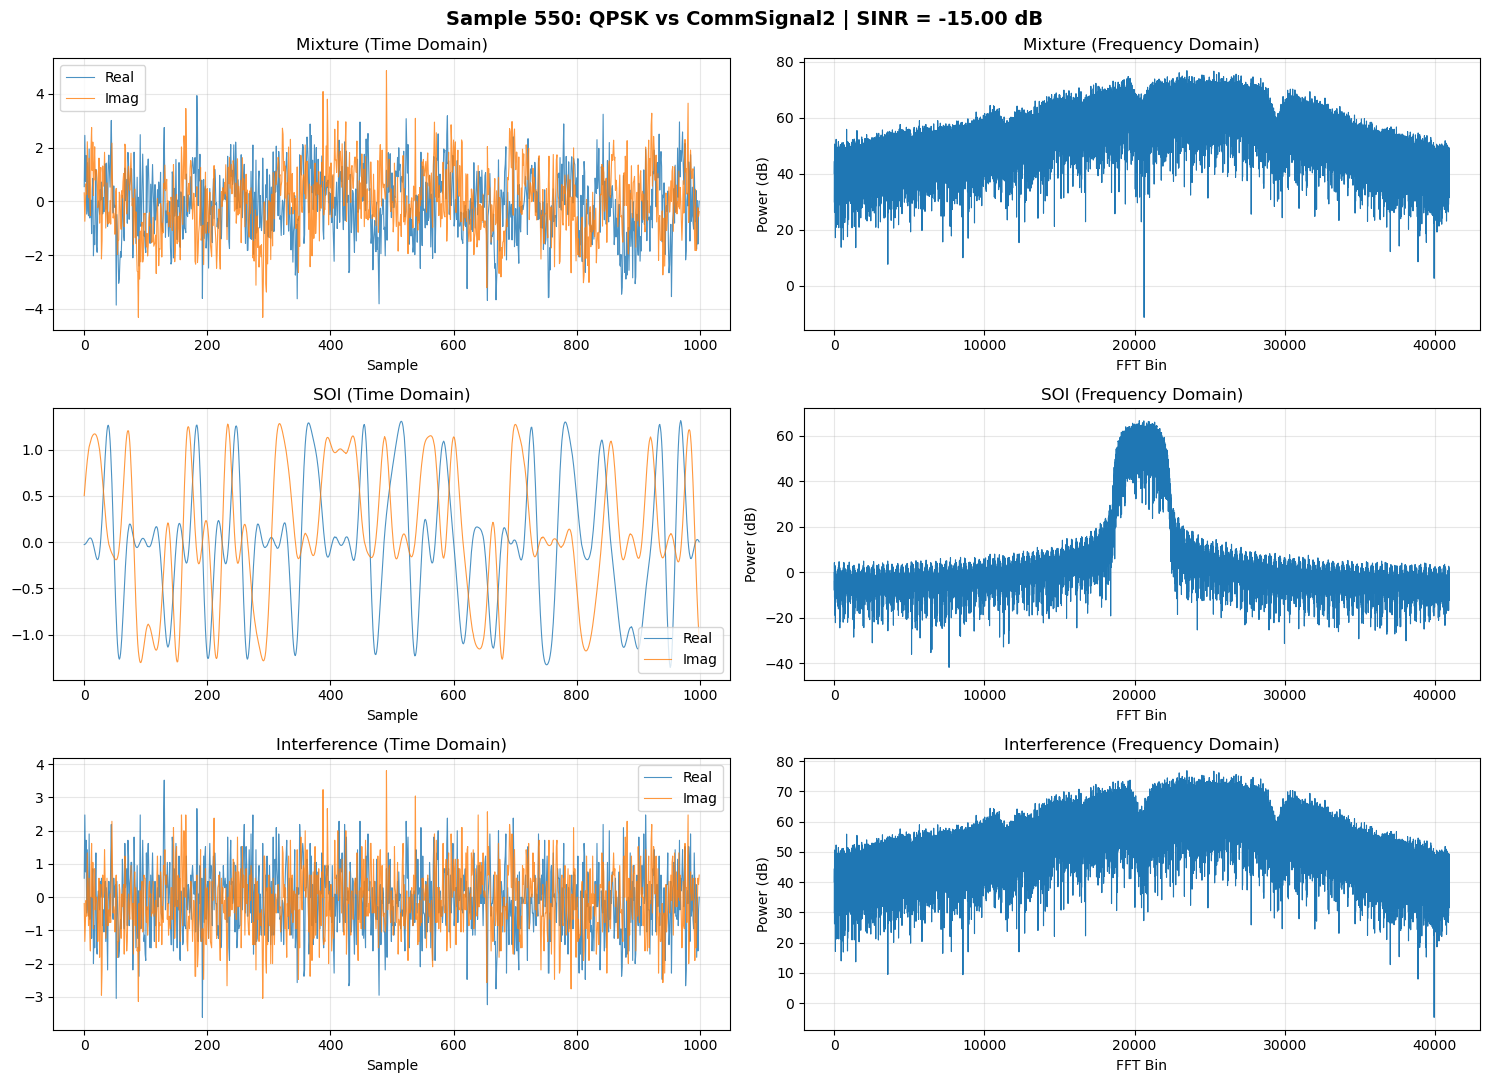


High SINR example (last sample):


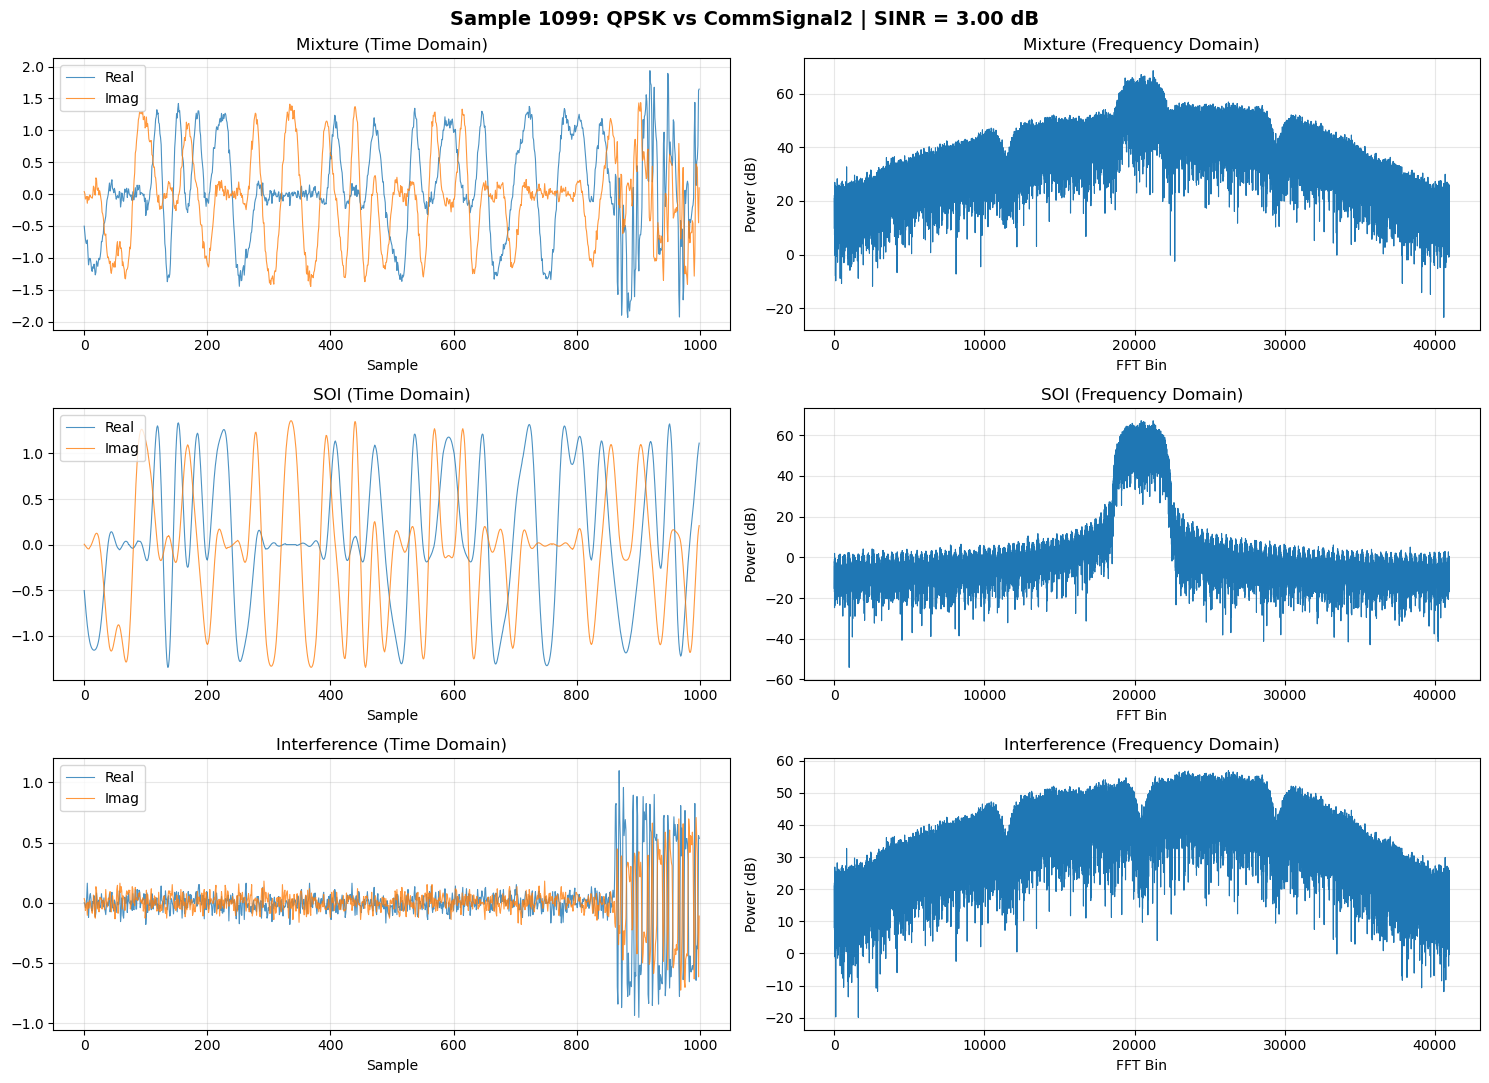

In [7]:
# Interactive visualization
def plot_mixture(idx):
    mixture = mixtures[idx]
    soi = soi_gt[idx]
    interference = mixture - soi
    meta = metadata[idx]
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 11))
    fig.suptitle(f"Sample {idx}: QPSK vs {meta['interference_type']} | "
                 f"SINR = {meta['actual_sinr_db']:.2f} dB", 
                 fontsize=14, fontweight='bold')
    
    # Mixture - time
    axes[0, 0].plot(np.real(mixture[:1000]), label='Real', alpha=0.8, linewidth=0.8)
    axes[0, 0].plot(np.imag(mixture[:1000]), label='Imag', alpha=0.8, linewidth=0.8)
    axes[0, 0].set_title('Mixture (Time Domain)')
    axes[0, 0].set_xlabel('Sample')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Mixture - frequency
    mixture_fft = np.fft.fftshift(np.fft.fft(mixture))
    axes[0, 1].plot(10 * np.log10(np.abs(mixture_fft)**2 + 1e-10), linewidth=0.8)
    axes[0, 1].set_title('Mixture (Frequency Domain)')
    axes[0, 1].set_xlabel('FFT Bin')
    axes[0, 1].set_ylabel('Power (dB)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # SOI - time
    axes[1, 0].plot(np.real(soi[:1000]), label='Real', alpha=0.8, linewidth=0.8)
    axes[1, 0].plot(np.imag(soi[:1000]), label='Imag', alpha=0.8, linewidth=0.8)
    axes[1, 0].set_title('SOI (Time Domain)')
    axes[1, 0].set_xlabel('Sample')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # SOI - frequency
    soi_fft = np.fft.fftshift(np.fft.fft(soi))
    axes[1, 1].plot(10 * np.log10(np.abs(soi_fft)**2 + 1e-10), linewidth=0.8)
    axes[1, 1].set_title('SOI (Frequency Domain)')
    axes[1, 1].set_xlabel('FFT Bin')
    axes[1, 1].set_ylabel('Power (dB)')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Interference - time
    axes[2, 0].plot(np.real(interference[:1000]), label='Real', alpha=0.8, linewidth=0.8)
    axes[2, 0].plot(np.imag(interference[:1000]), label='Imag', alpha=0.8, linewidth=0.8)
    axes[2, 0].set_title('Interference (Time Domain)')
    axes[2, 0].set_xlabel('Sample')
    axes[2, 0].legend()
    axes[2, 0].grid(True, alpha=0.3)
    
    # Interference - frequency
    int_fft = np.fft.fftshift(np.fft.fft(interference))
    axes[2, 1].plot(10 * np.log10(np.abs(int_fft)**2 + 1e-10), linewidth=0.8)
    axes[2, 1].set_title('Interference (Frequency Domain)')
    axes[2, 1].set_xlabel('FFT Bin')
    axes[2, 1].set_ylabel('Power (dB)')
    axes[2, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot different SINR levels
print("Low SINR example (first sample):")
plot_mixture(0)

print("\nMedium SINR example (middle sample):")
plot_mixture(len(mixtures)//2)

print("\nHigh SINR example (last sample):")
plot_mixture(len(mixtures)-1)

## 7. Analyze SINR Distribution

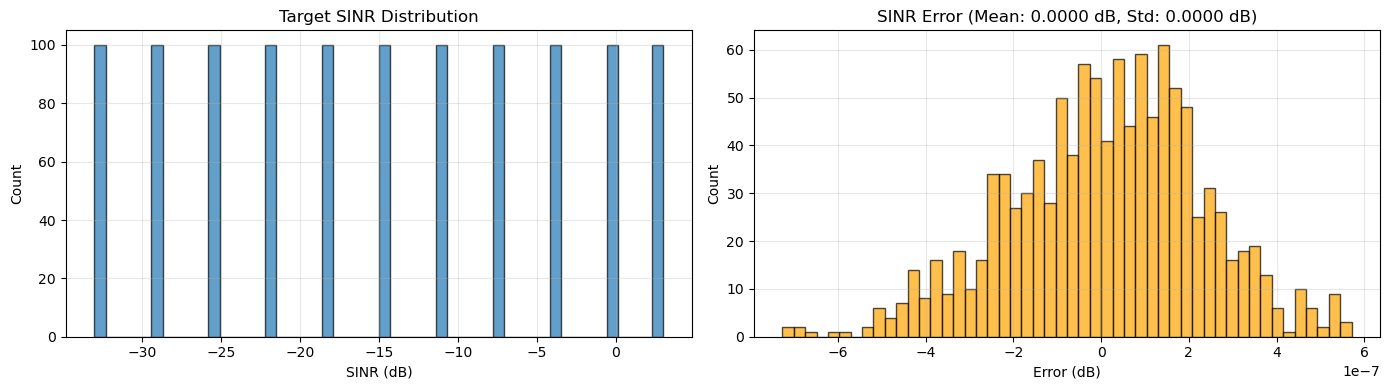


SINR Levels: 11
SINR Range: -33.0 to 3.0 dB
Samples per level: 100

SINR Levels:
   -33.0 dB:  100 samples
   -29.4 dB:  100 samples
   -25.8 dB:  100 samples
   -22.2 dB:  100 samples
   -18.6 dB:  100 samples
   -15.0 dB:  100 samples
   -11.4 dB:  100 samples
    -7.8 dB:  100 samples
    -4.2 dB:  100 samples
    -0.6 dB:  100 samples
    +3.0 dB:  100 samples


In [8]:
# Extract SINR values
target_sinrs = np.array([m['target_sinr_db'] for m in metadata])
actual_sinrs = np.array([m['actual_sinr_db'] for m in metadata])

# Plot histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Target SINR distribution
axes[0].hist(target_sinrs, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_title('Target SINR Distribution')
axes[0].set_xlabel('SINR (dB)')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3)

# SINR error
sinr_error = actual_sinrs - target_sinrs
axes[1].hist(sinr_error, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title(f'SINR Error (Mean: {sinr_error.mean():.4f} dB, Std: {sinr_error.std():.4f} dB)')
axes[1].set_xlabel('Error (dB)')
axes[1].set_ylabel('Count')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
unique_sinrs = np.unique(target_sinrs)
print(f"\nSINR Levels: {len(unique_sinrs)}")
print(f"SINR Range: {target_sinrs.min():.1f} to {target_sinrs.max():.1f} dB")
print(f"Samples per level: {len(target_sinrs) // len(unique_sinrs)}")
print(f"\nSINR Levels:")
for sinr in unique_sinrs:
    count = np.sum(target_sinrs == sinr)
    print(f"  {sinr:+6.1f} dB: {count:4d} samples")

## 8. Create PyTorch DataLoader

In [9]:
try:
    import torch
    from torch.utils.data import Dataset, DataLoader
    
    class RFChallengeDataset(Dataset):
        def __init__(self, mixture_file, groundtruth_file):
            # Load complex data
            self.mixtures = np.load(mixture_file)
            self.groundtruth = np.load(groundtruth_file)
            
            # Convert to real representation (2 channels: real + imag)
            self.mixtures_real = np.stack([
                np.real(self.mixtures),
                np.imag(self.mixtures)
            ], axis=1).astype(np.float32)
            
            self.gt_real = np.stack([
                np.real(self.groundtruth),
                np.imag(self.groundtruth)
            ], axis=1).astype(np.float32)
        
        def __len__(self):
            return len(self.mixtures)
        
        def __getitem__(self, idx):
            return (torch.from_numpy(self.mixtures_real[idx]),
                   torch.from_numpy(self.gt_real[idx]))
    
    # Create dataset
    dataset = RFChallengeDataset(mixture_file, gt_file)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    print(f"✅ PyTorch DataLoader created!")
    print(f"  Dataset size: {len(dataset)}")
    print(f"  Batch size: 32")
    print(f"  Number of batches: {len(dataloader)}")
    
    # Get one batch
    for batch_mixture, batch_gt in dataloader:
        print(f"\n  Batch shapes:")
        print(f"    Mixture: {batch_mixture.shape}  (batch, channels, samples)")
        print(f"    Ground truth: {batch_gt.shape}")
        break
        
except ImportError:
    print("⚠️ PyTorch not installed")
    print("Install with: conda install pytorch -c pytorch")

✅ PyTorch DataLoader created!
  Dataset size: 1100
  Batch size: 32
  Number of batches: 35

  Batch shapes:
    Mixture: torch.Size([32, 2, 40960])  (batch, channels, samples)
    Ground truth: torch.Size([32, 2, 40960])


## 9. Summary of Generated Files

In [10]:
# List all generated files
output_dir = Path('dataset/training_mixtures')

if output_dir.exists():
    print("Generated files:\n")
    
    mixture_files = sorted(output_dir.glob('*_mixtures.npy'))
    
    total_size = 0
    for f in mixture_files:
        base_name = str(f.name).replace('_mixtures.npy', '')
        
        mixture_file = output_dir / f'{base_name}_mixtures.npy'
        gt_file = output_dir / f'{base_name}_soi_groundtruth.npy'
        meta_file = output_dir / f'{base_name}_metadata.pkl'
        
        if mixture_file.exists() and gt_file.exists():
            size_mb = (mixture_file.stat().st_size + gt_file.stat().st_size) / 1024 / 1024
            total_size += size_mb
            
            print(f"✅ {base_name}")
            print(f"   Size: {size_mb:.1f} MB")
            
            # Load and show info
            data = np.load(mixture_file)
            print(f"   Samples: {data.shape[0]}")
            print()
    
    print(f"\nTotal size: {total_size:.1f} MB ({total_size/1024:.2f} GB)")
else:
    print("No files generated yet. Run the generation step above.")

Generated files:

✅ demodtrain_QPSK_CommSignal2
   Size: 687.5 MB
   Samples: 1100

✅ demodtrain_QPSK_CommSignal3
   Size: 687.5 MB
   Samples: 1100

✅ demodtrain_QPSK_EMISignal1
   Size: 687.5 MB
   Samples: 1100

✅ demodval_QPSK_CommSignal2
   Size: 687.5 MB
   Samples: 1100

✅ demodval_QPSK_CommSignal3
   Size: 687.5 MB
   Samples: 1100

✅ demodval_QPSK_EMISignal1
   Size: 687.5 MB
   Samples: 1100


Total size: 4125.0 MB (4.03 GB)
